Loaded: 00001.csv
Columns: ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time']
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   
3          4.019506         -0.996731              6.302176        1.0000   
4          4.004763         -0.992845              6.361645        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.262   9.360  
2         3.465  23.281  
3         3.451  36.406  
4         3.438  49.625  


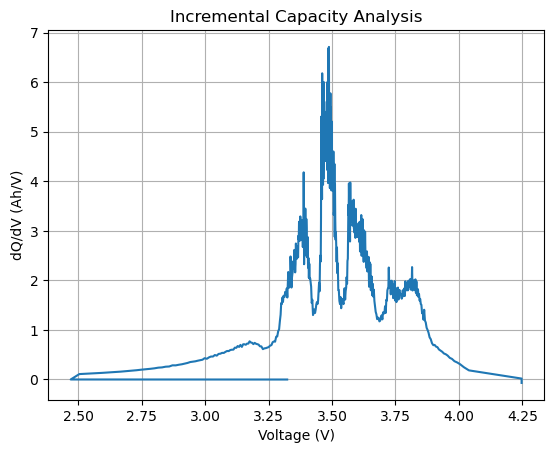

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
from src.capacity_analysis import calculate_dQdV, plot_dQdV

folder = "../data/raw"
files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])

df = pd.read_csv(os.path.join(folder, files[0]))  # Load first file
print("Loaded:", files[0])
print("Columns:", df.columns.tolist())
print(df.head())

voltage = df['Voltage_measured'].values
current = df['Current_measured'].values


df['Capacity'] = (current * (df['Time'].diff().fillna(0))) / 3600  # A*s → Ah
df['Capacity'] = df['Capacity'].cumsum()

V, dQdV = calculate_dQdV(voltage, df['Capacity'].values)
plot_dQdV(V, dQdV)